## Application Flow 
Decision Tree is one of the most fundamental algorithms for classification and regression in the Machine Learning world.

But before proceeding with the algorithm, let’s first discuss the lifecycle of any machine learning model. This diagram explains the creation of a Machine Learning model from scratch and then taking the same model further with hyperparameter tuning to increase its accuracy, deciding the deployment strategies for that model and once deployed setting up the logging and monitoring frameworks to generate reports and dashboards based on the client requirements. 
A typical lifecycle diagram for a machine learning model looks like:

<img src="MLApplicationFlow.PNG" width= "300">

## Decision Tree

Decision tree algorithm is one of the most versatile algorithms in machine learning which can perform both classification and regression analysis. It is very powerful and works great with complex datasets. Apart from that, it is very easy to understand and read. That makes it more popular to use. When coupled with ensemble techniques – which we will learn very soon- it performs even better.
As the name suggests, this algorithm works by dividing the whole dataset into a tree-like structure based on some rules and conditions and then gives prediction based on those conditions.
Let’s understand the approach to decision tree with a basic scenario. 
Suppose it’s Friday night and you are not able to decide if you should go out or stay at home. Let the decision tree decide it for you.


<img src="Decision_tree1.PNG" width="300">
                         
Although we may or may not use the decision tree for such decisions, this was a basic example to help you understand how a decision tree makes a decision.
So how did it work?
*	It selects a root node based on a given condition, e.g. our root node was chosen as time >10 pm.
*	Then, the root node was split into child notes based on the given condition. The right child node in the above figure fulfilled the condition, so no more questions were asked.
*	The left child node didn’t fulfil the condition, so again it was split based on a new condition.
*	This process continues till all the conditions are met or if you have predefined the depth of your tree, e.g. the depth of our tree is 3, and it reached there when all the conditions were exhausted.



#### Tree Pruning
Tree pruning is the method of trimming down a full tree (obtained through the above process) to reduce the complexity and variance in the data. Just as we regularised linear regression, we can also regularise the decision tree model by adding a new term. 


<img src="formula3.PNG" width="300">
                                       
Where, T  is the subtree which is a subset of the full tree T0
And α is the non-negative tuning parameter which penalises the MSE with an increase in tree length.
By using cross-validation, such values of α and T are selected for which our model gives the lowest test error rate.
This is how the decision tree regression model works. Let’s now see the working algorithm of doing classification using a decision tree.
Greedy Algorithm
As per Hands-on machine learning book “greedy algorithm greedily searches for an optimum split at the top level, then repeats the process at each level. It does not check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algorithm often produces a reasonably good solution, but it is not guaranteed to be the optimal solution.”


#### Post-pruning

Post-pruning, also known as backward pruning, is the process where the decision tree is generated first and then the non-significant branches are removed. Cross-validation set of data is used to check the effect of pruning and tests whether expanding a node will make an improvement or not. If any improvement is there then we continue by expanding that node else if there is reduction in accuracy then the node not be expanded and should be converted in a leaf node.


#### Pre-pruning

Pre-pruning, also known as forward pruning, stops the non-significant branches from generating. It uses a condition to decide when should it terminate splitting of some of the branches prematurely as the tree is generated. 


### Classification Trees

Regression trees are used for quantitative data. In the case of qualitative data or categorical data, we use classification trees.  In regression trees, we split the nodes based on RSS criteria, but in classification, it is done using classification error rate, Gini impurity and entropy.
Let’s understand these terms in detail.

#### Entropy
Entropy is the measure of randomness in the data. In other words, it gives the impurity present in the dataset.

<img src="entropy.PNG" width="300">
                                           
When we split our nodes into two regions and put different observations in both the regions, the main goal is to reduce the entropy i.e. reduce the randomness in the region and divide our data cleanly than it was in the previous node. If splitting the node doesn’t lead into entropy reduction, we try to split based on a different condition, or we stop. 
A region is clean (low entropy) when it contains data with the same labels and random if there is a mixture of labels present (high entropy).
Let’s suppose there are ‘m’ observations and we need to classify them into categories 1 and 2.
Let’s say that category 1 has ‘n’ observations and category 2 has ‘m-n’ observations.

p= n/m  and    q = m-n/m = 1-p

then, entropy for the given set is:


##          entropy = Σ  -p * log2(p)  
           
           
When all the observations belong to category 1, then p = 1 and all observations belong to category 2, then p =0, int both cases E =0, as there is no randomness in the categories.
If half of the observations are in category 1 and another half in category 2, then p =1/2 and q =1/2, and the entropy is maximum, E =1.


<img src="entropy1.PNG" width="300">
                                  

#### Information Gain
Information gain calculates the decrease in entropy after splitting a node. It is the difference between entropies before and after the split. The more the information gain, the more entropy is removed. 

<img src="info_gain.PNG" width="300">

                                 
Where, T is the parent node before split and X is the split node from T.

A tree which is splitted on basis of entropy and information gain value looks like:

<img src="entropy_tree.PNG" width="900">

#### Ginni Impurity
According to wikipedia, ‘Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labelled if it was randomly labelled according to the distribution of labels in the subset.’
It is calculated by multiplying the probability that a given observation is classified into the correct class and sum of all the probabilities when that particular observation is classified into the wrong class.
                                    
Ginni impurity value lies between 0 and 1, 0 being no impurity and 1 denoting random distribution.
The node for which the Ginni impurity is least is selected as the root node to split.


A tree which is splitted on basis of ginni impurity value looks like:

<img src="tree_example.PNG" width="900">




# Entropy and Information Gain

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.DataFrame({'X':[1,1,0,1], 'Y':[1,1,0,0],'Z':[1,0,1,0],'Label':['A','A','B','B']})
df

X  Y  Z Label
0  1  1  1     A
1  1  1  0     A
2  0  0  1     B
3  1  0  0     B

## X feature 
- Total ones in 'X' = 3
- Count of Label 'A' when X equal to 1 => 2
- Count of Label 'B' when X equal to 1 => 1


- Total zeros in 'X' = 1
- Count of Label 'A' when X equal to 0 => 0
- Count of Label 'B' when X equal to 0 => 1

##          entropy = Σ  -p * log2(p)  

In [3]:
# For One
entropy_X_1 = (-2/3*np.log2(2/3)) + (-1/3*np.log2(1/3))
print ('entropy_X_1  = ', entropy_X_1)

# For Zero
entropy_X_0 = (-0/1*np.log2(0/1)) + (-1/1*np.log2(1/1))
print ('entropy_X_0  = ',entropy_X_0)

entropy_X_1  =  0.9182958340544896
entropy_X_0  =  nan


In [4]:
df

X  Y  Z Label
0  1  1  1     A
1  1  1  0     A
2  0  0  1     B
3  1  0  0     B

## Y feature 
- Total ones in 'Y' = 2
- Count of Label 'A' when Y equal to 1 => 2
- Count of Label 'B' when Y equal to 1 => 0


- Total zeros in 'Y' = 2
- Count of Label 'A' when Y equal to 0 => 0
- Count of Label 'B' when Y equal to 0 => 2

In [5]:
# For one
entropy_Y_1 = (-2/2*np.log2(2/2)) + (-0/2*np.log2(0/2))
print ('entropy_Y_1  = ',entropy_Y_1)

# For zero
entropy_Y_0 = (-0/2*np.log2(0/2)) + (-2/2*np.log2(2/2))
print ('entropy_Y_0  = ',entropy_Y_0)

entropy_Y_1  =  nan
entropy_Y_0  =  nan


In [6]:
df

X  Y  Z Label
0  1  1  1     A
1  1  1  0     A
2  0  0  1     B
3  1  0  0     B

## Z feature 
- Total ones in 'Z' = 2
- Count of Label 'A' when Z equal to 1 => 1
- Count of Label 'B' when Z equal to 1 => 1


- Total zeros in 'Z' = 2
- Count of Label 'A' when Z equal to 0 => 1
- Count of Label 'B' when Z equal to 0 => 1

In [7]:
# For one
entropy_Z_1 = (-1/2*np.log2(1/2)) + (-1/2*np.log2(1/2))
print ('entropy_Z_1  = ',entropy_Z_1)

# For zero
entropy_Z_0 = (-1/2*np.log2(1/2)) + (-1/2*np.log2(1/2))
print ('entropy_Z_0  = ',entropy_Z_0)

entropy_Z_1  =  1.0
entropy_Z_0  =  1.0


### Finding Information Gain using entropy

## Inf.Gain = 1 - Σ sv/s * E

- s  = Total records
- sv = Category counts (1/0)
- E  = entropy



- entropy_X_1  =  0.9182958340544896
- entropy_X_0  =  nan

- entropy_Y_1  =  nan
- entropy_Y_0  =  nan

- entropy_Z_1  =  1.0
- entropy_Z_0  =  1.0

In [8]:
df

X  Y  Z Label
0  1  1  1     A
1  1  1  0     A
2  0  0  1     B
3  1  0  0     B

In [9]:
IG_X = 1-(3/4*0.918 + 1/4*0)
print ('IG_X = ',IG_X)

IG_Y = 1-(2/4*0 + 2/4*0)
print ('IG_Y = ',IG_Y)

IG_Z = 1-(2/4*1 + 2/4*1)
print ('IG_Z = ',IG_Z)

IG_X =  0.3115
IG_Y =  1.0
IG_Z =  0.0


## Gini Indexing

####  Gini Impurity = 1 - Σ p2

In [10]:
df = pd.DataFrame({'X':[17,2,10,11], 'B':[20,15,50,10],'C':[10,5,20,25],'Label':['P','N','P','N']})
df

X   B   C Label
0  17  20  10     P
1   2  15   5     N
2  10  50  20     P
3  11  10  25     N

In [11]:
# Let's check for >= 10 (how many class 'P')
# Total 3 data points (>= 10). 2 Positive and 1 Nagetive
Gx_gt_10 = 1 - (np.square(2/3) + np.square(1/3))
print ('Gx_gt_10 = ', Gx_gt_10)


# Total 1 data point (< 10). 0 Positive and 1 Nagetive
Gx_lt_10 = 1 - (np.square(0/1) + np.square(1/1))
print ('Gx_lt_10 = ', Gx_lt_10)

Gx_gt_10 =  0.4444444444444444
Gx_lt_10 =  0.0


In [12]:
# (Total data points >= 10 / Total data points in the dataset) * gini + 
# (Total data points < 10 / Total data points in the dataset)  * gini 
gini_impurity_X = ((3/4) * Gx_gt_10) + ((1/4) * Gx_lt_10)
print ('gini_impurity_X = ', gini_impurity_X )

gini_impurity_X =  0.3333333333333333


In [ ]:
# Similarly you can calculate for gini_impurity_Y and gini_impurity_Z

### Different Algorithms for Decision Tree


* ID3 (Iterative Dichotomiser) : It is one of the algorithms used to construct decision tree for classification. It uses Information gain as the criteria for finding the root nodes and splitting them. It only accepts categorical attributes.

* C4.5 : It is an extension of ID3 algorithm, and better than ID3 as it deals both continuous and discreet values.It is also used for classfication purposes.


* Classfication and Regression Algorithm(CART) : It is the most popular algorithm used for constructing decison trees. It uses ginni impurity as the default calculation for selecting root nodes, however one can use "entropy" for criteria as well. This algorithm works on both regression as well as classfication problems. We will use this algorithm in our pyhton implementation. 


Entropy and Ginni impurity can be used reversibly. It doesn't affects the result much. Although, ginni is easier to compute than entropy, since entropy has a log term calculation. That's why CART algorithm uses ginni as the default algorithm.

If we plot ginni vs entropy graph, we can see there is not much difference between them:

<img src="example/entropyVsGini.PNG" width = "400">



##### Advantages of Decision Tree:

   * It can be used for both Regression and Classification problems.
   * Decision Trees are very easy to grasp as the rules of splitting is clearly mentioned.
   * Complex decision tree models are very simple when visualized. It can be understood just by visualising.
   * Scaling and normalization are not needed.


##### Disadvantages of Decision Tree:


   * A small change in data can cause instability in the model because of the greedy approach.
   * Probability of overfitting is very high for Decision Trees.
   * It takes more time to train a decision tree model than other classification algorithms.

### Implementation in Python

we will use Sklearn module to implement decision tree algorithm. 
Sklearn uses CART (classification and Regression trees) algorithm and by default it uses Gini impurity as a criteria to split the nodes.

There are other algorithms like ID3, C4.5, Chi-square etc. 

We will see the use of CART in following implementation.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("wine.csv")
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol Alcohol_content  quality  
0      9.4             Low        5  
1      9.8          Medium        5  
2      9.8          Medium        5  
3      9.8          Medium        6  
4      9.4             Low        5

In [3]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

We can see there is no missing data in the columns. Great!!

In [4]:
# Describe method doesn't show categorical stats, we use isna() to check nulls
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

#### As we have categorical column (Alcohol_Content), we need to convert into numeric data using encoding method

In [5]:
from sklearn.preprocessing import OrdinalEncoder

In [6]:
ord_encoder = OrdinalEncoder(categories=[['Low','Medium','High']])
df1 = ord_encoder.fit_transform(data[['Alcohol_content']])
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

### Override alcohol content column with codes

In [7]:
data['Alcohol_content'] = df1

In [8]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  Alcohol_content  quality  
0      9.4              0.0        5  
1      9.8              1.0        5  
2      9.8              1.0        5  
3      9.8              1.0        6  
4      9.4              0.0        5

## Plotting Heatmap (Correlation matrix)

- Let's try to see if we can reduce the features using different techniques
- Let's plot heatmap to visualize and find the coefficient of multicollinearity


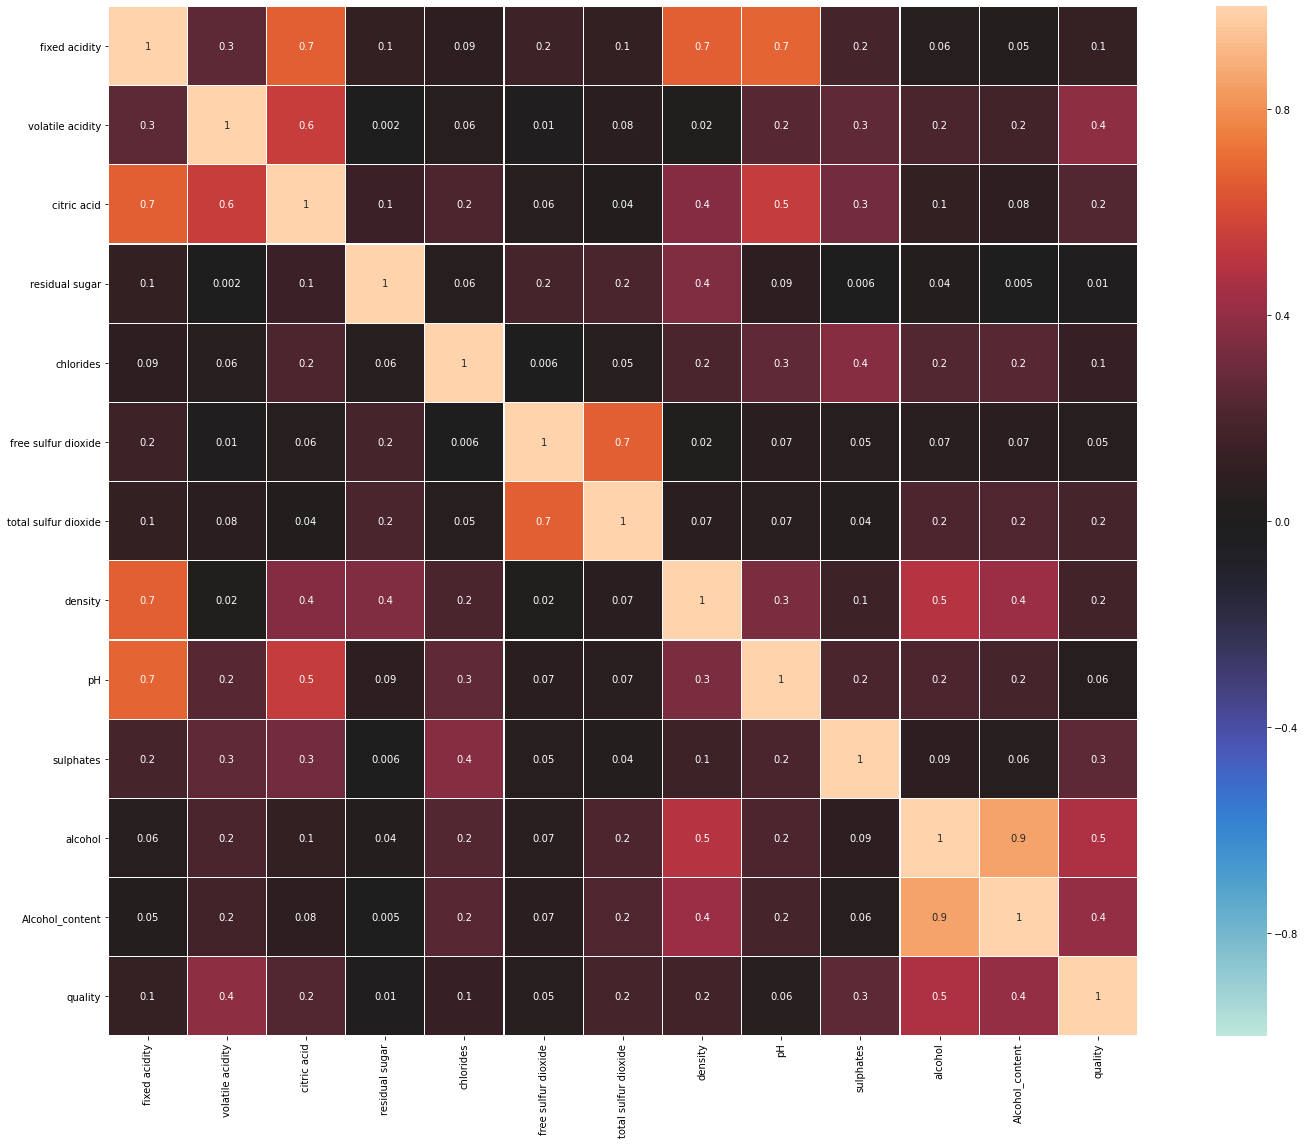

In [12]:
df_corr = data.corr().abs()

plt.figure(figsize=(22, 16))
sns.heatmap(df_corr,  vmin=-1, vmax=1, annot=True,
            square=True, center=0,fmt='.1g', linewidths=.1)
plt.tight_layout()

In [13]:
X = data.drop(columns = 'quality')
y = data['quality']

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state= 41)

In [15]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

#### Let's see how the tree looks like (This is nothing to do with algorithm/accuracy). It's just for visualization purpose

In [16]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'Alcohol_content']

In [17]:

import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image  
import pydotplus

# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

Let's understand the above tree:


<img src="tree_explain.PNG" width="300">

* the first value indicates the column and the condition on which the root node was selected and further will be splitted
* the second value gives the gini impurity of the selected node
* samples gives the number of observations at that point of time present in the node
* value within the square brackets represents number of observations present in each class(output) i.e. in the above given figure, 8 observations are in class 1, 38 in class 2 , 468 in class 3 and so on.

Then  the split was made on the basis of given condition.


In [18]:
clf.score(x_train,y_train)

1.0

In [19]:
y_pred = clf.predict(x_test)

In [20]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.6175

## How to understand confusion_matrix for multi class

In [21]:
confusion_matrix(y_test,y_pred)

array([[  0,   1,   1,   0,   1,   0],
       [  1,   1,   7,   2,   0,   0],
       [  1,   9, 112,  30,   5,   0],
       [  1,   5,  32, 102,  21,   7],
       [  0,   0,   7,  16,  31,   3],
       [  0,   0,   1,   0,   2,   1]], dtype=int64)

In [22]:
pd.DataFrame(confusion_matrix(y_test,y_pred), columns= ['Q3','Q4','Q5','Q6','Q7','Q8'], index=['Q3','Q4','Q5','Q6','Q7','Q8'])

Q3  Q4   Q5   Q6  Q7  Q8
Q3   0   1    1    0   1   0
Q4   1   1    7    2   0   0
Q5   1   9  112   30   5   0
Q6   1   5   32  102  21   7
Q7   0   0    7   16  31   3
Q8   0   0    1    0   2   1

Now we haven't done any prerocessing with our data and neither done any hyper parameter tunings.Let's do all those and see how our score improves.

### What are hyper parameters?
<img src="hypr_params.PNG" width="700">


We can see above the decision tree classifier algorithm takes all those parameters which are also known as hyperparameters.

Let's see the most important ones of the parameters(as per sklearn documentation) :
#### Parameters
  ----------
 * criterion : string, optional (default="gini")
       The function to measure the quality of a split. Supported criteria are
       "gini" for the Gini impurity and "entropy" for the information gain.
   
 *  splitter : string, optional (default="best")
       The strategy used to choose the split at each node. Supported
       strategies are "best" to choose the best split and "random" to choose
       the best random split.
   
 *  max_depth : int or None, optional (default=None)
       The maximum depth of the tree. If None, then nodes are expanded until
       all leaves are pure or until all leaves contain less than
       min_samples_split samples.
   
 *  min_samples_split : int, float, optional (default=2)
       The minimum number of samples required to split an internal node:
   
       - If int, then consider `min_samples_split` as the minimum number.
       - If float, then `min_samples_split` is a fraction and
         `ceil(min_samples_split * n_samples)` are the minimum
         number of samples for each split.
   
       .. versionchanged:: 0.18
          Added float values for fractions.
   
 *  min_samples_leaf : int, float, optional (default=1)
       The minimum number of samples required to be at a leaf node.
       A split point at any depth will only be considered if it leaves at
       least ``min_samples_leaf`` training samples in each of the left and
       right branches.  This may have the effect of smoothing the model,
       especially in regression.
   
       - If int, then consider `min_samples_leaf` as the minimum number.
       - If float, then `min_samples_leaf` is a fraction and
         `ceil(min_samples_leaf * n_samples)` are the minimum
         number of samples for each node.
   
 *  max_features : int, float, string or None, optional (default=None)
       The number of features to consider when looking for the best split:
   
           - If int, then consider `max_features` features at each split.
           - If float, then `max_features` is a fraction and
             `int(max_features * n_features)` features are considered at each
             split.
           - If "auto", then `max_features=sqrt(n_features)`.
           - If "sqrt", then `max_features=sqrt(n_features)`.
           - If "log2", then `max_features=log2(n_features)`.
           - If None, then `max_features=n_features`.
   
       Note: the search for a split does not stop until at least one
       valid partition of the node samples is found, even if it requires to
       effectively inspect more than ``max_features`` features.
   
 *  random_state : int, RandomState instance or None, optional (default=None)
       If int, random_state is the seed used by the random number generator;
       If RandomState instance, random_state is the random number generator;
       If None, the random number generator is the RandomState instance used
       by `np.random`.
   
 *  max_leaf_nodes : int or None, optional (default=None)
       Grow a tree with ``max_leaf_nodes`` in best-first fashion.
       Best nodes are defined as relative reduction in impurity.
       If None then unlimited number of leaf nodes.
   
 *  min_impurity_decrease : float, optional (default=0.)
       A node will be split if this split induces a decrease of the impurity
       greater than or equal to this value.
   
 *  min_impurity_split : float, (default=1e-7)
       Threshold for early stopping in tree growth. A node will split
       if its impurity is above the threshold, otherwise it is a leaf.
       
 *  class_weight : dict, list of dicts, "balanced" or None, default=None
       Weights associated with classes in the form ``{class_label: weight}``.
       If not given, all classes are supposed to have weight one. For
       multi-output problems, a list of dicts can be provided in the same
       order as the columns of y.
   
 * presort : bool, optional (default=False)
       Whether to presort the data to speed up the finding of best splits in
       fitting. For the default settings of a decision tree on large
       datasets, setting this to true may slow down the training process.
       When using either a smaller dataset or a restricted depth, this may
       speed up the training.
   

When we do hyperparameter tuning, we basically try to find those sets and values of hyperparameters which will give us a model with maximum accuracy.
Let's go ahead and try to improve our model.

Let's now try to tune some hyperparameters using the GridSearchCV algorithm.

GridSearchCV is a method used to tune our hyperparameters. We can pass different values of hyperparameters as parameters for grid search.
It does a exhaustive generation of combination of different parameters passed.
Using cross validation score, Grid Search returns the combination of hyperparameters for which the model is performing the best. 

In [23]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(3,12,2),
    'min_samples_leaf' : range(3,10,2),
    'min_samples_split': range(4,10,2)    
}

In [24]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [25]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [26]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [41]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =8,  min_samples_leaf=4,min_samples_split = 5)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.5825

In [36]:
y_pred = clf.predict(x_test)

In [37]:
accuracy_score(y_test,y_pred)

0.58


Let's visualize the final tree:

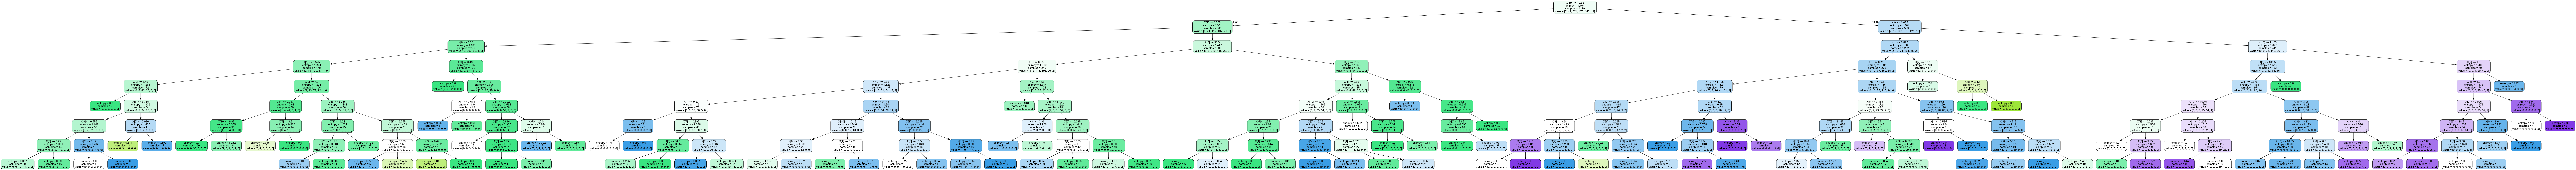

In [38]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("tree_hype.png")
# Show graph
Image(graph.create_png())